In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session














/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


0.8417508417508418

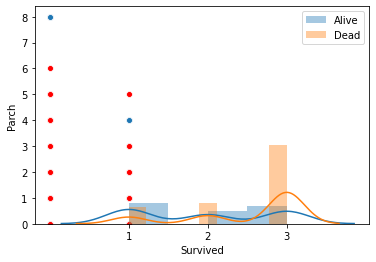

In [2]:

from sklearn.ensemble import RandomForestClassifier
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
import seaborn as sb
import matplotlib.pyplot as plt
sb.distplot(a=train[train['Survived']==1]['Pclass'],label='Alive')
sb.distplot(a=train[train['Survived']==0]['Pclass'],label='Dead')
plt.xticks([1,2,3])
#survival depends on pclass

#since age has null values
test['Age'].replace(np.nan,np.median(test['Age'].dropna()),inplace=True)
train['Age'].replace(np.nan,np.median(train['Age'].dropna()),inplace=True)
train.head()

train['Sex'].value_counts()
#most men die than woman
train['Embarked'].value_counts()
#depends on embarked place

sb.scatterplot(x=train['Survived'],y=train['SibSp'])
sb.scatterplot(x=train['Survived'],y=train['Parch'],color="red")

from sklearn.ensemble import RandomForestClassifier
coloum=["Pclass", "Sex", "SibSp", "Parch","Age","Embarked"]
X_test = pd.get_dummies(test[coloum])
X_train = pd.get_dummies(train[coloum])

y=train['Survived']  
basic = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
basic.fit(X_train, y)
#training model
y_pred = basic.predict(X_test)


answer = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
print(answer)

basic.score(X_train,y)
#answer.to_csv('my_submission.csv', index=False)


